In [ ]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords
from gensim.models import KeyedVectors
import gensim.downloader as api
from gensim.models import Word2Vec
import tensorflow as tf
import numpy as np


nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Downloading the Google Word2Vec word embeddings
print(api.load("word2vec-google-news-300", return_path=True))

In [ ]:
#Correct the data path 'preTrainedModelPath' as printed by previous cell if required
preTrainedModelPath = '../root/gensim-data/word2vec-google-news-300/word2vec-google-news-300.gz'
word_vectors = KeyedVectors.load_word2vec_format(preTrainedModelPath, binary=True)

In [ ]:
nlp = spacy.load('en_core_web_sm')

def tokenize(inputStr):
  doc = nlp(inputStr)
  # print(type(doc))
  tokens = [str(token) for token in doc]
  # print(type(tokens))
  return tokens

In [ ]:
stopWords = set(stopwords.words('english'))
# print(stopWords)
def removeStopWords(tokenizedSentence):
  filteredSent = []
  wordsIgnored = 0
  for token in tokenizedSentence:
    if token in stopWords:
      wordsIgnored+=1
      continue
    filteredSent.append(token)
  # print("Words ignored=",wordsIgnored)
  outputStr = " ".join(filteredSent)
  return outputStr


In [ ]:
#Enter the correct path of the uploaded dataset if different
df = pd.read_csv('../root/commentsDatasetLarge.csv')

In [ ]:
len(df)

56781

In [ ]:
df

,text,polarity,sentiment
0,god be praised a from drcongo,0.000000,neutral
1,fantastic performance good to see richard,0.550000,positive
2,greetings from kosovo south east europe,0.000000,neutral
3,it is monday evening in sydney australia when ...,0.387500,positive
4,watching this at the end of the day was so upl...,0.475000,positive
...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative
56777,congratulations now europe becomes chessboard ...,0.500000,positive
56778,if the west would deliver more weapons atm the...,0.178571,positive
56779,ukrainian people are showing the whole world ...,0.260000,positive


In [ ]:
df['text'][0]

'god be praised         a    from drcongo'

In [ ]:
import re
def removeExtraSpaces(inputStr):
  text = re.sub("\s{2,}"," ",inputStr)
  return text

# removeExtraSpaces(df['text'][0])

# Performing additional steps in pre-processing: Removal of extra spaces
df['text'] = df['text'].apply(lambda x: removeExtraSpaces(x))  
df

,text,polarity,sentiment
0,god be praised a from drcongo,0.000000,neutral
1,fantastic performance good to see richard,0.550000,positive
2,greetings from kosovo south east europe,0.000000,neutral
3,it is monday evening in sydney australia when ...,0.387500,positive
4,watching this at the end of the day was so upl...,0.475000,positive
...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative
56777,congratulations now europe becomes chessboard ...,0.500000,positive
56778,if the west would deliver more weapons atm the...,0.178571,positive
56779,ukrainian people are showing the whole world w...,0.260000,positive


In [ ]:
df['tokenized_text'] = df['text'].apply(lambda x: tokenize(x))

In [ ]:
df

,text,polarity,sentiment,tokenized_text
0,god be praised a from drcongo,0.000000,neutral,"[god, be, praised, a, from, drcongo]"
1,fantastic performance good to see richard,0.550000,positive,"[fantastic, performance, good, to, see, richard]"
2,greetings from kosovo south east europe,0.000000,neutral,"[greetings, from, kosovo, south, east, europe]"
3,it is monday evening in sydney australia when ...,0.387500,positive,"[it, is, monday, evening, in, sydney, australi..."
4,watching this at the end of the day was so upl...,0.475000,positive,"[watching, this, at, the, end, of, the, day, w..."
...,...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative,"[szelenskyy, snow, sorting, criminal, that, is..."
56777,congratulations now europe becomes chessboard ...,0.500000,positive,"[congratulations, now, europe, becomes, chessb..."
56778,if the west would deliver more weapons atm the...,0.178571,positive,"[if, the, west, would, deliver, more, weapons,..."
56779,ukrainian people are showing the whole world w...,0.260000,positive,"[ukrainian, people, are, showing, the, whole, ..."


In [ ]:
# Performing additional steps in pre-processing: Removal of stopwords
df['tokenized_text_2'] = df['tokenized_text'].apply(lambda x: removeStopWords(x))

In [ ]:
df['tokenized_text_2'][0]

'god praised drcongo'

In [ ]:
df1 = df 

In [ ]:
df1.to_pickle("./processed_dataset.pkl")


In [ ]:
df

,text,polarity,sentiment,tokenized_text,tokenized_text_2
0,god be praised a from drcongo,0.000000,neutral,"[god, be, praised, a, from, drcongo]",god praised drcongo
1,fantastic performance good to see richard,0.550000,positive,"[fantastic, performance, good, to, see, richard]",fantastic performance good see richard
2,greetings from kosovo south east europe,0.000000,neutral,"[greetings, from, kosovo, south, east, europe]",greetings kosovo south east europe
3,it is monday evening in sydney australia when ...,0.387500,positive,"[it, is, monday, evening, in, sydney, australi...",monday evening sydney australia tune week appr...
4,watching this at the end of the day was so upl...,0.475000,positive,"[watching, this, at, the, end, of, the, day, w...",watching end day uplifting comforting song cho...
...,...,...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative,"[szelenskyy, snow, sorting, criminal, that, is...",szelenskyy snow sorting criminal fact
56777,congratulations now europe becomes chessboard ...,0.500000,positive,"[congratulations, now, europe, becomes, chessb...",congratulations europe becomes chessboard supe...
56778,if the west would deliver more weapons atm the...,0.178571,positive,"[if, the, west, would, deliver, more, weapons,...",west would deliver weapons atm seems enough st...
56779,ukrainian people are showing the whole world w...,0.260000,positive,"[ukrainian, people, are, showing, the, whole, ...",ukrainian people showing whole world fighting ...


In [ ]:
sentences = df['tokenized_text_2']
sentences = [str(s) for s in sentences]
sentences

['god praised drcongo',
 'fantastic performance good see richard',
 'greetings kosovo south east europe',
 'monday evening sydney australia tune week appreciate music word week miss favorite flautist dark spiky hair disrespect excellent musician place thanks involved',
 'watching end day uplifting comforting song choices definitely inspired wonderful thank person participated made happen know real reason church good brings days praise god',
 'joined church jesus christ latter day saints years ago freeze ghana west africa always enjoyed tabernacle choir looked forward listening tabernacle choir general conference view young woman mom blessed opportunity watch listen tabernacle anytime social media listened inspires life spirit hope believe someday dwell heavenly father',
 'thank music',
 'wish thank tabernacle choir sharing awesome christian music video',
 'good melodia thanks lady organ',
 'born world multitude things evident ofcourse walk life blinders mediphoricaly speaking may learn

In [ ]:
#All code changes from this point

In [ ]:
def normalizeRangeR(val):
  oldMin = -1.0
  oldMax = 1.0
  newMin =0.0
  newMax = 1.0
  oldRange  = oldMax - oldMin
  newRange = newMax - newMin
  polarity = (((val - oldMin) * newRange) / oldRange) + newMin
  return polarity

def normalizeRangeC(val):
  if val>=0:
    return int(1)
  else:
    return int(0)

# Perform additional steps in data preparation for classification and regression tasks

# Converting labels to 1 or 0 for classification tasks
df['polarity_c']=df['polarity'].apply(lambda x: normalizeRangeC(x))

# Scaling labels in the range  0 to 1 for regression tasks
df['polarity_r']=df['polarity'].apply(lambda x: normalizeRangeR(x))


In [ ]:
df

,text,polarity,sentiment,tokenized_text,tokenized_text_2,polarity_new,polarity_c,polarity_r
0,god be praised a from drcongo,0.000000,neutral,"[god, be, praised, a, from, drcongo]",god praised drcongo,0.500000,1,0.500000
1,fantastic performance good to see richard,0.550000,positive,"[fantastic, performance, good, to, see, richard]",fantastic performance good see richard,0.775000,1,0.775000
2,greetings from kosovo south east europe,0.000000,neutral,"[greetings, from, kosovo, south, east, europe]",greetings kosovo south east europe,0.500000,1,0.500000
3,it is monday evening in sydney australia when ...,0.387500,positive,"[it, is, monday, evening, in, sydney, australi...",monday evening sydney australia tune week appr...,0.693750,1,0.693750
4,watching this at the end of the day was so upl...,0.475000,positive,"[watching, this, at, the, end, of, the, day, w...",watching end day uplifting comforting song cho...,0.737500,1,0.737500
...,...,...,...,...,...,...,...,...
56776,szelenskyy snow sorting criminal that is a fact,-0.400000,negative,"[szelenskyy, snow, sorting, criminal, that, is...",szelenskyy snow sorting criminal fact,0.300000,0,0.300000
56777,congratulations now europe becomes chessboard ...,0.500000,positive,"[congratulations, now, europe, becomes, chessb...",congratulations europe becomes chessboard supe...,0.750000,1,0.750000
56778,if the west would deliver more weapons atm the...,0.178571,positive,"[if, the, west, would, deliver, more, weapons,...",west would deliver weapons atm seems enough st...,0.589286,1,0.589286
56779,ukrainian people are showing the whole world w...,0.260000,positive,"[ukrainian, people, are, showing, the, whole, ...",ukrainian people showing whole world fighting ...,0.630000,1,0.630000


In [ ]:
labelsC = df['polarity_c']
labelsR = df['polarity_r']


In [ ]:
positiveCount = 0
negativeCount = 0
for polarity_c in labelsC:
  if polarity_c == 1:
    positiveCount +=1
  else:
    negativeCount +=1
print("No. of positive comments: ",positiveCount)
print("No. of negative comments: ",negativeCount)
print("Total no. of comments:",(positiveCount+negativeCount))

No. of positive comments:  45109
No. of negative comments:  11672
Total no. of comments: 56781


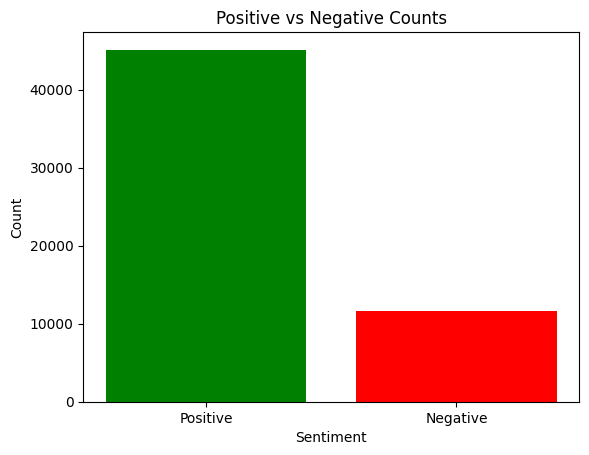

In [ ]:
import matplotlib.pyplot as plt
# Create a bar chart
labels = ['Positive', 'Negative']
values = [positiveCount, negativeCount]
colors = ['green', 'red']
plt.bar(labels, values, color=colors)
plt.title('Positive vs Negative Counts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# labels = [int(label) for label in labels]

In [ ]:
labelsR

0        0.500000
1        0.775000
2        0.500000
3        0.693750
4        0.737500
           ...   
56776    0.300000
56777    0.750000
56778    0.589286
56779    0.630000
56780    0.500000
Name: polarity_r, Length: 56781, dtype: float64

LSTM Models: classification and regression

In [ ]:
# CREATING TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_trainC, x_testC, y_trainC, y_testC = train_test_split(sentences, labelsC, test_size = 0.3, train_size=0.7, random_state=1)

x_trainR, x_testR, y_trainR, y_testR = train_test_split(sentences, labelsR, test_size = 0.3, train_size=0.7, random_state=1)

In [ ]:
len(y_trainC)

39746

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(x_trainC)
vocab_size = len(tokenizer.word_counts) + 2

In [ ]:
print(vocab_size)

38688


In [ ]:
word2idx= tokenizer.word_index
idx2word = {k:v for (v,k) in word2idx.items()}

In [ ]:
# word2idx

In [ ]:
seqLengths = np.array([len( s.split() ) for s in x_trainC] )
print( [ (p, np.percentile(seqLengths, p)) for p in [25,50,75,80,90,95,99,100]])

[(25, 4.0), (50, 7.0), (75, 14.0), (80, 17.0), (90, 28.0), (95, 44.0), (99, 123.0), (100, 1030.0)]


In [ ]:
maxSeqLen = 125

In [ ]:

x_train_as_ints = tokenizer.texts_to_sequences(x_trainC)
x_train_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_train_as_ints, maxlen=maxSeqLen)

y_train_as_ints_C = np.array(y_trainC)
y_train_as_ints_R = np.array(y_trainR)

In [ ]:
x_test_as_ints = tokenizer.texts_to_sequences(x_testC)
x_test_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_test_as_ints, maxlen=maxSeqLen)

y_test_as_ints_C = np.array(y_testC)
y_test_as_ints_R = np.array(y_testR)

In [ ]:
# Creating and embedding matrix for our vocabulary

embedding_dim = 300
hits = 0
misses =0

embeddingMatrix = np.zeros((vocab_size,embedding_dim))
for word, i in tokenizer.word_index.items():
  if word in word_vectors:
    embeddingVector = word_vectors[word]
    embeddingMatrix[i] = embeddingVector
    hits+=1
  else:
    misses+=1

In [ ]:
print("Converted words: %d (no. of misses: %d)" % (hits, misses))

Converted words: 27728 (no. of misses: 10959)


In [ ]:
# Defining the classification model

modelC = tf.keras.models.Sequential()
modelC.add(tf.keras.layers.Embedding(
    vocab_size, 
    300,
    input_length=maxSeqLen,
    embeddings_initializer=tf.keras.initializers.Constant(embeddingMatrix),
    trainable=False) )
modelC.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(maxSeqLen)))
# modelC.add(tf.keras.layers.LSTM(105, dropout=0.5, recurrent_dropout=0.5))
modelC.add(tf.keras.layers.Dense(64,activation='relu'))
modelC.add(tf.keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
# Defining the regression model

modelR = tf.keras.models.Sequential()
modelR.add(tf.keras.layers.Embedding(
    vocab_size, 
    300,
    input_length=maxSeqLen,
    embeddings_initializer=tf.keras.initializers.Constant(embeddingMatrix),
    trainable=False) )
modelR.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(maxSeqLen)))
# modelR.add(tf.keras.layers.LSTM(105, dropout=0.5, recurrent_dropout=0.5))
modelR.add(tf.keras.layers.Dense(64,activation='relu'))
modelR.add(tf.keras.layers.Dense(1))

In [ ]:
data_dir = '../root/data'
logs_dir = '../root/logs'

best_model_file_C = '../root/data/best_model_C.h5'
best_model_file_R = '../root/data/best_model_R.h5'

checkpointC = tf.keras.callbacks.ModelCheckpoint(best_model_file_C,save_best_only=True,save_weights_only=True)
checkpointR = tf.keras.callbacks.ModelCheckpoint(best_model_file_R,save_best_only=True,save_weights_only=True)

tensorboard = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)

In [ ]:
modelC.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy']
               )
print(modelC.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 125, 300)          11606400  
                                                                 
 bidirectional_22 (Bidirecti  (None, 250)              426000    
 onal)                                                           
                                                                 
 dense_39 (Dense)            (None, 64)                16064     
                                                                 
 dense_40 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,048,529
Trainable params: 442,129
Non-trainable params: 11,606,400
_________________________________________________________________
None


In [ ]:
modelR.compile(loss='mse',
               optimizer='adam',
               metrics=['mse']
               )
print(modelC.summary())

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 125, 300)          11606400  
                                                                 
 bidirectional_22 (Bidirecti  (None, 250)              426000    
 onal)                                                           
                                                                 
 dense_39 (Dense)            (None, 64)                16064     
                                                                 
 dense_40 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,048,529
Trainable params: 442,129
Non-trainable params: 11,606,400
_________________________________________________________________
None


Training and evaluating LSTM classification model

In [ ]:
historyC = modelC.fit(x_train_as_ints, y_train_as_ints_C, epochs=10,validation_split=0.2,batch_size =64,callbacks=[checkpointC, tensorboard])

Epoch 1/10
497/497 [==============================] - 84s 162ms/step - loss: 0.4079 - accuracy: 0.8224 - val_loss: 0.3460 - val_accuracy: 0.8552
Epoch 2/10
497/497 [==============================] - 79s 159ms/step - loss: 0.3178 - accuracy: 0.8681 - val_loss: 0.3054 - val_accuracy: 0.8770
Epoch 3/10
497/497 [==============================] - 79s 159ms/step - loss: 0.2738 - accuracy: 0.8889 - val_loss: 0.2802 - val_accuracy: 0.8892
Epoch 4/10
497/497 [==============================] - 79s 159ms/step - loss: 0.2372 - accuracy: 0.9045 - val_loss: 0.2667 - val_accuracy: 0.8935
Epoch 5/10
497/497 [==============================] - 79s 159ms/step - loss: 0.1987 - accuracy: 0.9224 - val_loss: 0.2571 - val_accuracy: 0.9001
Epoch 6/10
497/497 [==============================] - 79s 160ms/step - loss: 0.1585 - accuracy: 0.9397 - val_loss: 0.2694 - val_accuracy: 0.9068
Epoch 7/10
497/497 [==============================] - 79s 159ms/step - loss: 0.1214 - accuracy: 0.9540 - val_loss: 0.2858 - val_ac

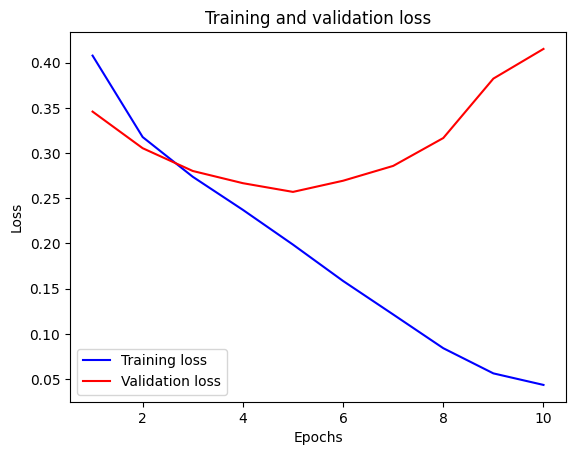

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Plot the training and validation loss vs epoch
train_loss = historyC.history['loss']
val_loss = historyC.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
modelC.load_weights(best_model_file_C)
modelC.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
modelC.evaluate(x_test_as_ints,y_test_as_ints_C)

533/533 [==============================] - 26s 46ms/step - loss: 0.2605 - accuracy: 0.8999


[0.2605108916759491, 0.8998532295227051]

In [ ]:
testSentences = ["this is a bad product", 'amazing music', "horrible attitude of this politician", "This is shambolic"]
# testSentences = ["this is a bad product"]

cleanedSentences = []
for sen in testSentences:
  cleanedSent  = removeStopWords(tokenize(sen))
  cleanedSentences.append(cleanedSent)

testSentences = np.array(cleanedSentences)

x_as_ints = tokenizer.texts_to_sequences(testSentences)
x_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_as_ints, maxlen=maxSeqLen)

x = modelC.predict(x_as_ints)

1/1 [==============================] - 0s 36ms/step


In [ ]:
for val in x:
  print(val)

[0.00010724]
[0.99989426]
[1.2012749e-06]
[0.99632806]


In [ ]:
for prob in x:
  if prob >= 0.5:
    print("Positive")
  else:
    print("Negative")

Negative
Positive
Negative
Positive


In [ ]:
print(y_train_as_ints_R)
historyR = modelR.fit(x_train_as_ints, y_train_as_ints_R, epochs=10,validation_split=0.2,batch_size =64,callbacks=[checkpointR, tensorboard])

[1.         0.7875     0.2        ... 0.65916667 0.6        0.54375   ]
Epoch 1/10
497/497 [==============================] - 83s 160ms/step - loss: 0.0166 - mse: 0.0166 - val_loss: 0.0110 - val_mse: 0.0110
Epoch 2/10
497/497 [==============================] - 79s 159ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 3/10
497/497 [==============================] - 80s 161ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0079 - val_mse: 0.0079
Epoch 4/10
497/497 [==============================] - 79s 158ms/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 5/10
497/497 [==============================] - 78s 158ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 6/10
497/497 [==============================] - 79s 158ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 7/10
497/497 [==============================] - 79s 158ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0065 -

In [ ]:
modelR.load_weights(best_model_file_R)
modelR.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [ ]:
modelR.evaluate(x_test_as_ints,y_test_as_ints_R)

533/533 [==============================] - 36s 63ms/step - loss: 0.0059 - mse: 0.0059


[0.005901405122131109, 0.005901405122131109]

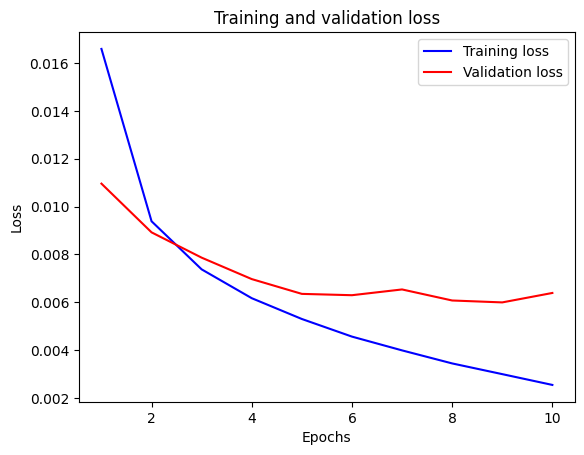

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Plot the training and validation loss vs epoch
train_loss = historyR.history['loss']
val_loss = historyR.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
testSentences = ["this is a bad product", 'amazing music', "horrible attitude of this politician", "This is shambolic"]

cleanedSentences = []
for sen in testSentences:
  cleanedSent  = removeStopWords(tokenize(sen))
  cleanedSentences.append(cleanedSent)

testSentences = np.array(cleanedSentences)

x_as_ints = tokenizer.texts_to_sequences(testSentences)
x_as_ints = tf.keras.preprocessing.sequence.pad_sequences(x_as_ints, maxlen=maxSeqLen)

x = modelR.predict(x_as_ints)

1/1 [==============================] - 1s 734ms/step


In [ ]:
print("Polarities")
for pol in x:
  print(pol)

Polarities
[0.20636103]
[0.7896189]
[0.04502684]
[0.50816673]
